[Keras](https://www.tensorflow.org/guide/keras/overview) is used for model construction, training, dataset handling, and evaluating the model's accuracy.

In [1]:
import tensorflow as tf

Below is the example of the images from the MNIST dataset.

![Example of the image](https://machinelearningmastery.com/wp-content/uploads/2019/02/Plot-of-a-Subset-of-Images-from-the-MNIST-Dataset-1024x768.png)


 The pixel values of the images range from 0 through 255. Scale these values to a range of 0 to 1 by dividing the values by `255.0`. This also converts the sample data from integers to floating-point numbers:

In [2]:
# Assign the dataset into a variable
mnist = tf.keras.datasets.mnist
# Separate the set into the training and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Scale the values into 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Create a `tf.keras.Sequential` neural network:

In [3]:
# Make a sequential model
# Each layer has one input tensor and one output tensor
# This model uses the Flatten, Dense, and Dropout layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(50, activation ='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# Check the accuracy of untrained model
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.2571179 , -0.68463016, -0.5912735 ,  0.71269786,  0.17579095,
         1.1499965 , -0.18438411,  0.40694946,  0.16449852,  0.44142896]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to *probabilities* for each class:

In [5]:
# Use softmax method to tranform the outputs into readable 0-1 format
tf.nn.softmax(predictions).numpy()

array([[0.0936521 , 0.03651923, 0.04009275, 0.1476976 , 0.08633715,
        0.22871244, 0.06022484, 0.10878989, 0.08536768, 0.11260633]],
      dtype=float32)

Define a loss function for training using `losses.SparseCategoricalCrossentropy`:

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

The loss function output is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [7]:
loss_fn(y_train[:1], predictions).numpy()

1.4752898

Configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [8]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

Use the `Model.fit` method to adjust model parameters and minimize the loss:

In [9]:
# The inputs are the number images, the digits are the actual digits, and the number of times each data is touched
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8162 - loss: 0.6224
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9309 - loss: 0.2331
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9443 - loss: 0.1896
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9513 - loss: 0.1626
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9545 - loss: 0.1485
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9583 - loss: 0.1356
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9589 - loss: 0.1313
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9623 - loss: 0.1212
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9650 - loss: 0.1145
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9647 - loss: 0.1101


The `Model.evaluate` method checks the model's performance, usually on a [validation set](https://developers.google.com/machine-learning/glossary#validation-set) or [test set](https://developers.google.com/machine-learning/glossary#test-set).

In [10]:
# Evaluate the model, using the testing data
model.evaluate(x_test, y_test, verbose= 2)

313/313 - 1s - 4ms/step - accuracy: 0.9714 - loss: 0.1012


[0.10123607516288757, 0.9714000225067139]

For a model that returns a probability, wrap the trained model, and attach the softmax to it:

In [11]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

Using the prediction model on actual examples:

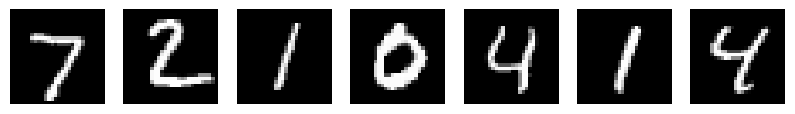

Predicted classes: [7 2 1 0 4 1 4]


In [12]:
import matplotlib.pyplot as plt

def show_image(images):
    plt.figure(figsize=(10, 2))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
    plt.show()

# Display the first 5 images in `x_test`
show_image(x_test[:7].squeeze())

# Get predictions using the trained model
predictions = probability_model(x_test[:7])
# Get the highest prob
predicted_classes = tf.argmax(predictions, axis=1)

# Print the predicted classes
print("Predicted classes:", predicted_classes.numpy())